In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.dates as mpldates
import matplotlib.patches as patches
from os.path import join as pjoin
from obspy import read_events
from obspy.geodetics.base import gps2dist_azimuth
from obspy.taup import TauPyModel

#### Data

In [ ]:
#IRIS
IRISlw = "./Output/Data_Quality/DataBandpassed0.5_1.0/Summary/IRIS_Data/Final_Selection_for_plot"
IRISup = "./Output/Data_Quality/DataBandpassed1.0_1.8/Summary/IRIS_Data/Final_Selection_for_plot"
#TORD
TORDlw = "./Output/Data_Quality/DataBandpassed0.5_1.0/Summary/TORD_Data/Final_Selection_for_plot"
TORDup = "./Output/Data_Quality/DataBandpassed1.0_1.8/Summary/TORD_Data/Final_Selection_for_plot"

#read
#ax1

dataIRISlwP = pd.read_csv(pjoin(IRISlw, "IRIS_event_picked_P_final.csv"))
dataIRISlwP_S = pd.read_csv(pjoin(IRISlw,"IRIS_event_picked_P_S_final.csv"))
#dataIRISlwS = pd.read_csv(pjoin(IRISlw, "IRIS_event_picked_S_final.csv"))
dataTORDlwP = pd.read_csv(pjoin(TORDlw, "TORD_event_picked_P_final.csv"))
dataTORDlwP_S = pd.read_csv(pjoin(TORDlw, "TORD_event_picked_P_S_final.csv"))
#dataTORDlwS = pd.read_csv(pjoin(TORDlw, "TORD_event_picked_S_final.csv"))

dataAll_lw = pd.concat([dataIRISlwP_S,dataTORDlwP_S],axis=0)
dataAllEq_lw = dataAll_lw.drop_duplicates(subset='origin')
dataAllSt_lw = dataAll_lw.drop_duplicates(subset='station')

#ax1-Earthquakes


#ax1-Stations


#ax2
dataIRISupP = pd.read_csv(pjoin(IRISup, "IRIS_event_picked_P_final.csv"))
dataIRISupP_S = pd.read_csv(pjoin(IRISup, "IRIS_event_picked_P_S_final.csv"))
#dataIRISupS = pd.read_csv(pjoin(IRISup, "IRIS_event_picked_S_final.csv"))
dataTORDupP = pd.read_csv(pjoin(TORDup, "TORD_event_picked_P_final.csv"))
dataTORDupP_S = pd.read_csv(pjoin(TORDup, "TORD_event_picked_P_S_final.csv"))
#dataTORDupS = pd.read_csv(pjoin(TORDup, "TORD_event_picked_S_final.csv"))

dataAll_up = pd.concat([dataIRISupP_S,dataTORDupP_S],axis=0)
dataAllEq_up = dataAll_up.drop_duplicates(subset='origin')
dataAllSt_up = dataAll_up.drop_duplicates(subset='station')



#Earthquakes





#Stations
stlon_up = dataAllSt_up['stlon'].values
stlat_up = dataAllSt_up['stlat'].values
st_up = dataAllSt_up['station'].values

elon_upps = dataAll_up['lon'].values
elat_upps = dataAll_up['lat'].values
stlon_upps = dataAll_up['stlon'].values
stlat_upps = dataAll_up['stlat'].values

elon_lwps = dataAll_lw['lon'].values
elat_lwps = dataAll_lw['lat'].values
stlon_lwps = dataAll_lw['stlon'].values
stlat_lwps = dataAll_lw['stlat'].values


#Picks count

len(dataIRISupP)
len(dataIRISupP_S)

Pickcount = [len(dataIRISlwP),len(dataIRISlwP_S),len(dataTORDlwP), 
             len(dataTORDlwP_S),len(dataIRISupP),len(dataIRISupP_S),len(dataTORDupP), 
             len(dataTORDupP_S)]
xpos = [2,3,6,7,11,12,15,16]


PickcountP = [len(dataIRISlwP), len(dataTORDlwP), 
             len(dataIRISupP),len(dataTORDupP)]
xposP = [2,6,11,15]

PickcountPS = [len(dataIRISlwP_S),len(dataTORDlwP_S), 
             len(dataIRISupP_S),len(dataTORDupP_S)]
xposPS = [3,7,12,16]


dataAllEq_up = dataAllEq_up.sort_values(by=['origin'],ascending = False)


dataAllEq_up.reset_index(drop=True, inplace=True)
dataAllEq_up

In [ ]:
dataAllEq_lw = dataAllEq_lw.sort_values(by=['origin'],ascending = False)
dataAllEq_lw.reset_index(drop=True, inplace=True)
dataAllEq_lw



#### Summary Plot of Data Quality

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-4-842a09f0a2a0>:161: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markers,stemlines,baseline = ax4.stem(time_up,mag_up)


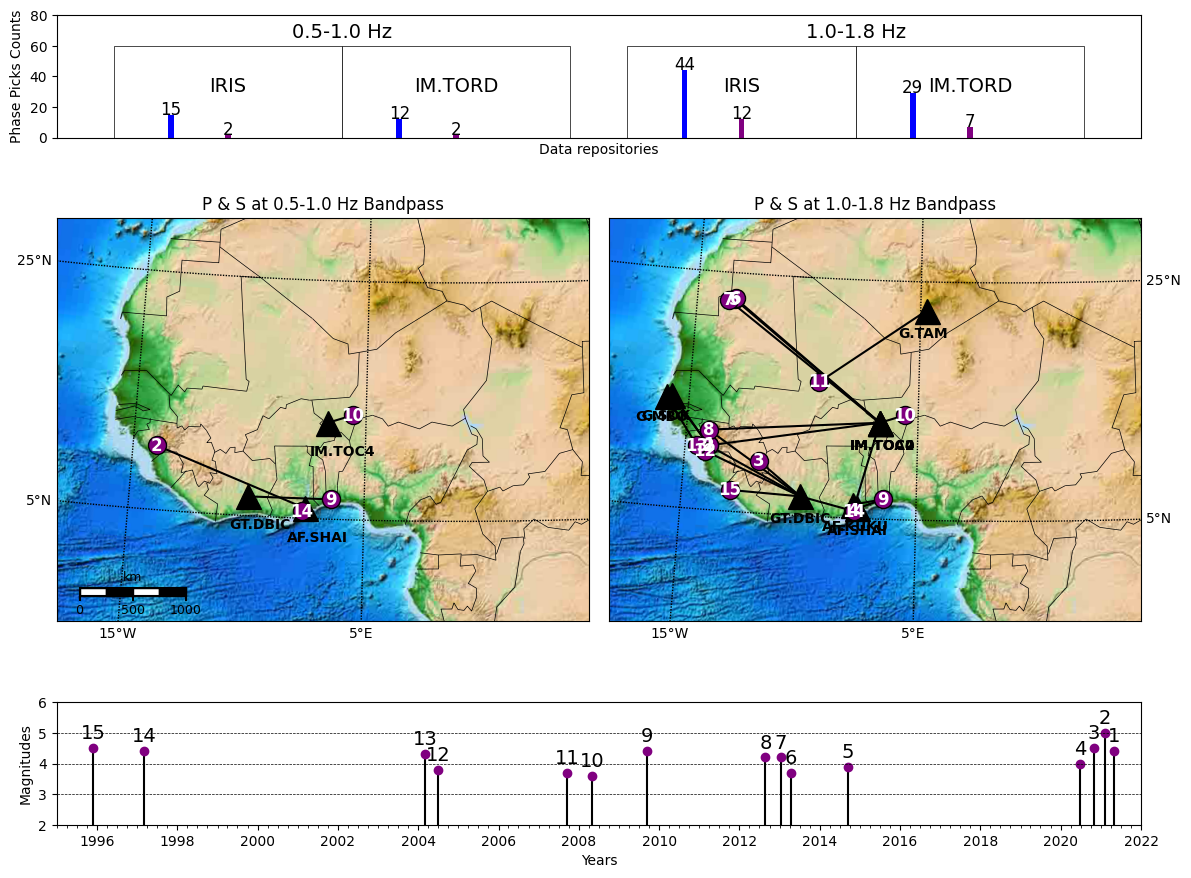

In [4]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (12,9)


numup = range(1,16,1)
numlw = [2,9,10,14]

GRind = [0,1,2,7,11,12,14]
NRind = [3,8,13]
MaliRind = [10]
MauritaniaRind = [4,5,6]
NigerRind = [9]





#1-----------------------------------------------------------
ax1 = plt.subplot2grid((6, 2), (0, 0), colspan=2,rowspan=1)

for i in [1,5,10,14]:
    ax1.add_patch(
    patches.Rectangle(
    (i , -1), # (x,y)
    4, #width
    61, # height
    # You can add rotation as well with 'angle'
    facecolor="White", edgecolor="black", linewidth=0.5, linestyle='solid'))

    ax1.bar(xposP,PickcountP, width=0.1, color='blue')
    ax1.bar(xposPS,PickcountPS, width=0.1, color='purple')

for pos,frecband in zip([5,14],["0.5-1.0 Hz","1.0-1.8 Hz"]):
    ax1.annotate(frecband, xy=(pos,65),
    xytext=(pos,65),color="black",ha='center',fontsize = 14
    )

for pos, source in zip([3,7,12,16],["IRIS","IM.TORD","IRIS","IM.TORD"]):
    ax1.annotate(source, xy=(pos,30),
    xytext=(pos,30),color="black",ha='center',fontsize = 14
    )

for pos, count in zip(xpos,Pickcount):
    ax1.annotate(str(count), xy=(pos,count+0.2),
    xytext=(pos,count+0.2),color="black",ha='center',fontsize = 12
    ) 

ax1.set_xticks([])
ax1.set_xlim(0,19)
ax1.set_ylim(0,80)
ax1.set_xlabel("Data repositories")
ax1.set_ylabel("Phase Picks Counts")

#2-----------------------------------------------------------
ax2 = plt.subplot2grid((6, 2), (1, 0), colspan=1,rowspan=4)
m1 = Basemap(projection='lcc',
            resolution= "c",lat_0=10,lon_0=13,
            llcrnrlon=-20,llcrnrlat=- 5,
            urcrnrlon=25.,urcrnrlat= 30,fix_aspect =True,
            ax=ax2)

m1.drawcountries()
m1.etopo()
m1.drawmapscale(-14., -2, -3.25, 39.5, 1000, barstyle='fancy')
m1.drawparallels(np.arange(-35,50,20),labels=[1,0,0,0])
m1.drawmeridians(np.arange(-15,50,20),labels=[0,0,0,1])


elon_lw = dataAllEq_lw['lon'].values
elat_lw = dataAllEq_lw['lat'].values
stlon_lw = dataAllSt_lw['stlon'].values
stlat_lw = dataAllSt_lw['stlat'].values
st_lw = dataAllSt_lw['station'].values


nxlw = stlon_lw-1.5
nylw = stlat_lw-2.5
elon_lw,elat_lw = m1(elon_lw,elat_lw) 
stlon_lw,stlat_lw = m1(stlon_lw,stlat_lw) 
nxlw,nylw =m1(nxlw,nylw)

for x,y,name,nxlw,nylw in zip(stlon_lw,stlat_lw,st_lw,nxlw,nylw):
    m1.plot(x,y, c='black', marker='^', markersize= 18)
    plt.text(nxlw,nylw,name,fontsize= 10,ha='left',va='center',fontweight='bold')
    
for x,y,stx,sty in zip(elon_lw,elat_lw,stlon_lw,stlat_lw):
    lons_lw = [x,stx]
    lats_lw =[y,sty]
    m1.plot(lons_lw,lats_lw, c='black') 
     
for x,y,num in zip(elon_lw,elat_lw,numlw): 
    plt.text(x,y,num,fontsize= 12,ha='center',va='center',fontweight='bold',c='white')
    m1.plot(x,y, c='purple', marker='o',markeredgecolor='black', markersize= 13)

ax2.set_title("P & S at 0.5-1.0 Hz Bandpass",)


#3---------------------------------------------------
ax3 = plt.subplot2grid((6, 2), (1, 1), colspan=1,rowspan=4)
m2 = Basemap(projection='lcc',
            resolution= "c",lat_0=10,lon_0=13,
            llcrnrlon=-20,llcrnrlat=- 5,
            urcrnrlon=25.,urcrnrlat= 30,fix_aspect =True,
            ax=ax3)

m2.drawparallels(np.arange(-35,50,20),labels=[0,1,0,0])
m2.drawmeridians(np.arange(-15,50,20),labels=[0,0,0,1])
m2.drawcountries()
m2.etopo()

elon_up = dataAllEq_up['lon'].values
elat_up = dataAllEq_up['lat'].values


elon_upps,elat_upps = m2(elon_upps,elat_upps)  
stlon_upps,stlat_upps = m2(stlon_upps,stlat_upps) 
for x,y,stx,sty in zip(elon_upps,elat_upps,stlon_upps,stlat_upps):
    lons_up = [x,stx]
    lats_up =[y,sty]
    m2.plot(lons_up,lats_up, c='black') 

nxup = stlon_up-2.5
nyup = stlat_up-2
stlon_up,stlat_up = m2(stlon_up,stlat_up)
nxup,nyup =m2(nxup,nyup)
for x,y,name,nxup,nyup in zip(stlon_up,stlat_up,st_up,nxup,nyup):
    m2.plot(x,y, c='black', marker='^', markersize= 18)
    plt.text(nxup,nyup,name,fontsize= 10,ha='left',va='center',fontweight='bold')

elon_up, elat_up =m2(elon_up, elat_up)
for x,y,num in zip(elon_up,elat_up,numup):    
    plt.text(x,y,num,fontsize= 12,ha='center',va='center',fontweight='bold',c='white')
    m2.plot(x,y, c='purple', marker='o',markeredgecolor='k', markersize= 13)
 
    
ax3.set_title("P & S at 1.0-1.8 Hz Bandpass")




#4------------------------------------------------------
numall = numup
mag_lw = dataAllEq_lw['mag'].values
mag_up = dataAllEq_up['mag'].values

time_up = dataAllEq_up['origin']
time_up = pd.to_datetime(time_up)
ax4 = plt.subplot2grid((6, 2), (5, 0), colspan=2,rowspan=1)


#Region(ax4)


for x,y,z in zip(time_up,mag_up,numall):
    ax4.annotate(z, xy=(x,y),
    xytext=(x, y+0.3),color="black",ha='center',fontsize = 14
    )
#stems 

#ax4.stem(time_up,mag_up)
markers,stemlines,baseline = ax4.stem(time_up,mag_up)
plt.setp(markers, marker = 'o', color = 'purple')
plt.setp(stemlines, color = 'black')



#ax4.scatter(time_up,mag_up, c='purple', marker='o')
#
ax4.axhline(5,color='Black', linestyle='--',linewidth=0.5)
ax4.axhline(4,color='Black', linestyle='--',linewidth=0.5)
ax4.axhline(3,color='Black', linestyle='--',linewidth=0.5)

# Major ticks every year.
fmt_year = mpldates.YearLocator(2)
ax4.xaxis.set_major_locator(fmt_year)
# Minor ticks every 3 month.
fmt_3month = mpldates.MonthLocator(interval=3)
ax4.xaxis.set_minor_locator(fmt_3month)
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax4.xaxis.set_major_formatter(mpldates.DateFormatter('%Y'))

ax4.set_xlim(pd.Timestamp('1995'), pd.Timestamp('2022'))
ax4.set_ylim(2,6)
ax4.set_xlabel("Years")
ax4.set_ylabel("Magnitudes")

plt.gcf()
plt.tight_layout()
plt.show()

#### Add list of phase arrival time to csv file

In [5]:
dataAll = pd.concat([dataAllEq_up.drop(dataAllEq_up.index[[1,8,9,13]]),dataAllEq_lw],axis=0)
dataAll = dataAll.sort_values(by=['origin'],ascending = False)
dataAll.reset_index(drop=True, inplace=True)
dataAll

,country,origin,lon,lat,depth,mag,magtype,station,stlon,stlat,Pick_P,P_corr,P_SNR,Pick_S,S_corr,S_SNR
0,GUINEA REGION,2021-05-04T07:02:48.768000Z,-12.98,10.44,10.0,4.4,mb,G.SOK,-16.46,14.40,Yes,-0.5,5.9,Yes,-0.8,6.1
1,GUINEA REGION,2021-02-03T09:55:06.388000Z,-12.97,10.42,10.0,5.0,mb,IM.TOC4,1.69,13.15,Yes,-7.3,5.6,Yes,-15.7,4.7
2,GUINEA REGION,2020-10-31T07:20:38.829000Z,-8.55,9.41,10.0,4.5,mb,GT.DBIC,-4.86,6.63,Yes,-1.2,4.9,Yes,13.3,4.6
3,GHANA,2020-06-24T22:53:51.827000Z,-0.34,5.60,10.0,4.0,mb,IM.TOC4,1.69,13.15,Yes,-0.8,5.0,Yes,-6.2,4.8
4,MAURITANIA,2014-09-15T12:41:29.460000Z,-11.66,22.80,10.0,3.9,mb,IM.TOC2,1.69,13.15,Yes,6.1,4.6,Yes,11.9,4.6
5,MAURITANIA,2013-04-13T15:29:49.040000Z,-11.60,22.88,10.0,3.7,mb,IM.TOC4,1.69,13.15,Yes,4.5,4.5,Yes,-1.4,4.6
6,MAURITANIA,2013-01-08T15:33:10.180000Z,-12.21,22.71,10.0,4.2,mb,IM.TOC2,1.69,13.15,Yes,4.7,5.5,Yes,6.6,5.0
7,GUINEA REGION,2012-08-23T22:03:51.150000Z,-13.08,11.75,10.0,4.2,mb,GT.DBIC,-4.86,6.63,Yes,0.7,4.6,Yes,-6.1,4.8
8,BENIN - TOGO REGION,2009-09-11T03:10:19.080000Z,2.17,6.68,10.0,4.4,mb,AF.SHAI,0.04,5.84,Yes,4.4,5.3,Yes,-21.8,4.9
9,NIGER,2008-04-29T15:05:32.780000Z,3.85,13.85,5.5,3.6,mb,IM.TOC4,1.69,13.15,Yes,6.4,5.1,Yes,3.6,5.8


In [ ]:
mtau = TauPyModel("iasp91")

#Function to remove duplicated phases in list
def Phasett(arr):
  # To correct duplicated phase arrival in list
    P_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0] == 'P' and str(arr[i])[1] == ' ']
    S_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0] == 'S' and str(arr[i])[1] == ' ']
    PP_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0:2] == 'PP'] 
    sP_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0:2] == 'sP'] 
    pP_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0:2] == 'pP'] 
    sS_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0:2] == 'sS'] 
    SS_index_pos_list = [i for i in range(len(arr)) if str(arr[i])[0:2] == 'SS']  

    iP = P_index_pos_list[0]
    iS = S_index_pos_list[0]
    iPP = PP_index_pos_list[0]
    isP = sP_index_pos_list[0]
    ipP = pP_index_pos_list[0]
    isS = sS_index_pos_list[0]
    iSS = SS_index_pos_list[0]

    all_phases = [arr[iP].time,arr[ipP].time,arr[isP].time,arr[iPP].time,arr[iS].time,arr[isS].time,arr[iSS].time]
    PS_Phases = [arr[iP].time,arr[iS].time]
    return PS_Phases,all_phases

#Arrival Time
All_phases = []
Arrival_PS = []
azimuths = []
back_azimuths = []
epi_distance_deg = []
folders=[]
for index,row in dataAll.iterrows():

    country = row["country"]
    otime = row["origin"]
    lat1 = row["lat"]
    lon1 = row["lon"]
    lat2 = row["stlat"]
    lon2 = row["stlon"]

    #Phase arrival times-------------------
    dist, az, baz = gps2dist_azimuth(lat1, lon1, lat2, lon2, a=6378137.0, f=0.0033528106647474805) #dist(m)
    dist_km = dist/1000  #dist(km)

    
    source_depth_in_km = row["depth"]
    epicentral_distance_degree = dist_km/111

    arr = mtau.get_travel_times(
            source_depth_in_km=source_depth_in_km, distance_in_degree=epicentral_distance_degree,
            phase_list=["P","S","PP", "sP", "pP", "sS", "SS"])

    
    Phasearrivals = Phasett(arr)

    All_arr = Phasearrivals[1]
    P_S_arr = Phasearrivals[0]
    
    
    azimuths.append(az)
    back_azimuths.append(baz)
    epi_distance_deg.append(epicentral_distance_degree ) 
    All_phases.append(All_arr)
    Arrival_PS.append(P_S_arr) 
    
 
    for delimiter in ["-",":"]:
        otime = otime.replace(delimiter,"")
    folder = country[:4] + otime[:15]

    folders.append(folder)

#### Input for final catalog

In [7]:
cat = read_events("quakes_xml/WafrQuakes90_21.xml")


Final_eq_time = []
indlist = []
for time in dataAll['origin'].values:
    Final_eq_time.append(time[:19])
    
for iev,event in enumerate(cat):
    evid = str(event.origins[0].time)
    evid = evid[:19]
    
    if evid in Final_eq_time:

        evid = evid[0:4] + evid[5:7] + evid[8:13] + evid[14:16] + evid[17:19]
        evloc = event.event_descriptions[0].text
        evid = evloc[:4] + evid
        pathdir = ("data/events/%s")%evid
        indlist.append(iev)
        

Freqmin = [1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,1.0]
Freqmax = [1.8,1.0,1.8,1.8,1.8,1.8,1.8,1.8,1.0,1.0,1.8,1.8,1.8,1.0,1.8]
BBColors = ["purple","purple","purple","orange","black","black","black","purple","orange","red",
            "saddlebrown","purple","purple","orange","purple"]

dataAll.insert(2, "WAcat_index",indlist, True)
dataAll.insert(9, "Freqmin",Freqmin, True)
dataAll.insert(10, "Freqmax",Freqmax, True)
dataAll.insert(19, "BBColors",BBColors, True)
dataAll.insert(20, "Arrival_PS",Arrival_PS, True)
dataAll.insert(21, "All_phases",All_phases, True)
dataAll.insert(22, "epi_distance_deg",epi_distance_deg, True)
dataAll.insert(23, "azimuths",azimuths, True)
dataAll.insert(24, "back_azimuths",back_azimuths, True)
dataAll.insert(25, "folders",folders, True)

dataAll.to_csv('Output/Input_SSMTI/MTInputCatalog/event_summary.csv',index=False)
dataAll

,country,origin,WAcat_index,lon,lat,depth,mag,magtype,station,Freqmin,...,Pick_S,S_corr,S_SNR,BBColors,Arrival_PS,All_phases,epi_distance_deg,azimuths,back_azimuths,folders
0,GUINEA REGION,2021-05-04T07:02:48.768000Z,2,-12.98,10.44,10.0,4.4,mb,G.SOK,1.0,...,Yes,-0.8,6.1,purple,"[78.0203919073, 139.221114252]","[78.0203919073, 80.4228773619, 81.9286904634, ...",5.214505,319.541884,138.792748,GUIN20210504T070248
1,GUINEA REGION,2021-02-03T09:55:06.388000Z,3,-12.97,10.42,10.0,5.0,mb,IM.TOC4,0.5,...,Yes,-15.7,4.7,purple,"[207.192186381, 370.709968971]","[207.192186381, 209.614595873, 211.114919911, ...",14.646031,77.849772,260.860637,GUIN20210203T095506
2,GUINEA REGION,2020-10-31T07:20:38.829000Z,4,-8.55,9.41,10.0,4.5,mb,GT.DBIC,1.0,...,Yes,13.3,4.6,purple,"[69.4843711751, 123.878161125]","[69.4843711751, 71.8862583687, 73.3922320076, ...",4.593383,126.813435,307.328587,GUIN20201031T072038
3,GHANA,2020-06-24T22:53:51.827000Z,5,-0.34,5.60,10.0,4.0,mb,IM.TOC4,1.0,...,Yes,-6.2,4.8,orange,"[113.337893204, 202.660706005]","[113.337893204, 115.743816546, 117.248683976, ...",7.786328,14.796339,195.127773,GHAN20200624T225351
4,MAURITANIA,2014-09-15T12:41:29.460000Z,33,-11.66,22.80,10.0,3.9,mb,IM.TOC2,1.0,...,Yes,11.9,4.6,black,"[224.410152923, 402.305511793]","[224.410152923, 226.938773459, 228.41058302, 2...",15.946727,124.831817,308.983458,MAUR20140915T124129
5,MAURITANIA,2013-04-13T15:29:49.040000Z,86,-11.60,22.88,10.0,3.7,mb,IM.TOC4,1.0,...,Yes,-1.4,4.6,black,"[224.414753638, 402.314086977]","[224.414753638, 226.943384376, 228.415191189, ...",15.947080,125.195291,309.337250,MAUR20130413T152949
6,MAURITANIA,2013-01-08T15:33:10.180000Z,98,-12.21,22.71,10.0,4.2,mb,IM.TOC2,1.0,...,Yes,6.6,5.0,black,"[229.183891183, 411.301838516]","[229.183891183, 231.752124901, 233.213712829, ...",16.317793,123.375488,307.688930,MAUR20130108T153310
7,GUINEA REGION,2012-08-23T22:03:51.150000Z,108,-13.08,11.75,10.0,4.2,mb,GT.DBIC,1.0,...,Yes,-6.1,4.8,purple,"[138.247684784, 247.3519477]","[138.247684784, 140.656946225, 142.16089606, 1...",9.602760,121.370618,302.686957,GUIN20120823T220351
8,BENIN - TOGO REGION,2009-09-11T03:10:19.080000Z,186,2.17,6.68,10.0,4.4,mb,AF.SHAI,0.5,...,Yes,-21.8,4.9,orange,"[37.7106839856, 66.7451662203]","[37.7106839856, 40.1111309765, 41.6174975118, ...",2.282419,248.608820,68.376531,BENI20090911T031019
9,NIGER,2008-04-29T15:05:32.780000Z,220,3.85,13.85,5.5,3.6,mb,IM.TOC4,0.5,...,Yes,3.6,5.8,red,"[37.3818225671, 66.0711745144]","[37.3818225671, 38.702552825, 39.5309179545, 4...",2.219252,251.930849,71.426541,NIGE20080429T150532
